In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/yield_df.csv')

In [ ]:
df.sample(5)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
5181,5181,Burundi,Sorghum,1994,9938,1274.0,84.45,21.25
24868,24868,South Africa,Potatoes,2001,311961,495.0,26857.00,15.68
4648,4648,Brazil,Potatoes,2012,274457,1761.0,346583.00,21.02
1355,1355,Australia,Maize,2004,56326,534.0,36276.00,20.42
23064,23064,Pakistan,Soybeans,2012,7901,494.0,990.09,23.10


## 1. Identification Columns
### A. Yield Measurement (Output)
**hg/ha_yield:** The total crop yield, measured in hectograms per hectare (hg/ha). This represents how much of a specific crop was harvested per unit area.

---

## 2. Feature Columns (Factors Affecting Crop Yield)

These columns represent different **agricultural and environmental factors** that influence crop production.

### A. Area:
The name of the country where the data was recorded (e.g., Albania, Zimbabwe).

### B. Item:
The type of **crop** (e.g., Maize, Potatoes, Wheat, Rice).

### C. Year:
The year in which the data was collected.


### D. Environmental Factors
These features represent natural environmental conditions affecting agriculture.

- **average_rain_fall_mm_per_year**: The **average yearly rainfall** in **millimeters (mm)**.  
  - Higher rainfall generally supports better crop growth, but excessive rainfall may lead to flooding.
  - Example: Albania consistently has **1485 mm of rainfall** in the dataset.

- **avg_temp**: The **average temperature** for that year (likely in **degrees Celsius**).
  - Temperature affects crop growth, **with extreme heat or cold reducing yields**.

### E. Agricultural Practices
These columns represent human-driven agricultural interventions.

- **pesticides_tonnes**: The **total amount of pesticides used**, measured in **tonnes**.
  - Higher pesticide use may indicate pest control measures but could also raise environmental concerns.
  - Example: Albania's pesticide usage increased from **121 tonnes (1990) to 502.86 tonnes (1999)**.

---

## 3. Key Insights
- **Yield Trends**: The `hg/ha_yield` column helps analyze **how crop productivity changes over time**.
- **Impact of Rainfall & Temperature**: Countries with **higher rainfall** and **moderate temperatures** generally have **higher yields**.
- **Pesticide Usage**: Increased pesticide use could indicate **efforts to combat pests or boost yield**.


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [ ]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df.corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


## The "average_rain_fall_mm_per_year" column have some rows that are float and some that are neumerical strings. So we need to remove those rows containing neumerical strings values.

In [ ]:
def floatOrStr(val):
  try:
    float(val)
    return False
  except ValueError:
    return True

In [ ]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(floatOrStr)].index

In [ ]:
df = df.drop(to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


## Ploting frequency of each country

<Axes: xlabel='count', ylabel='Area'>

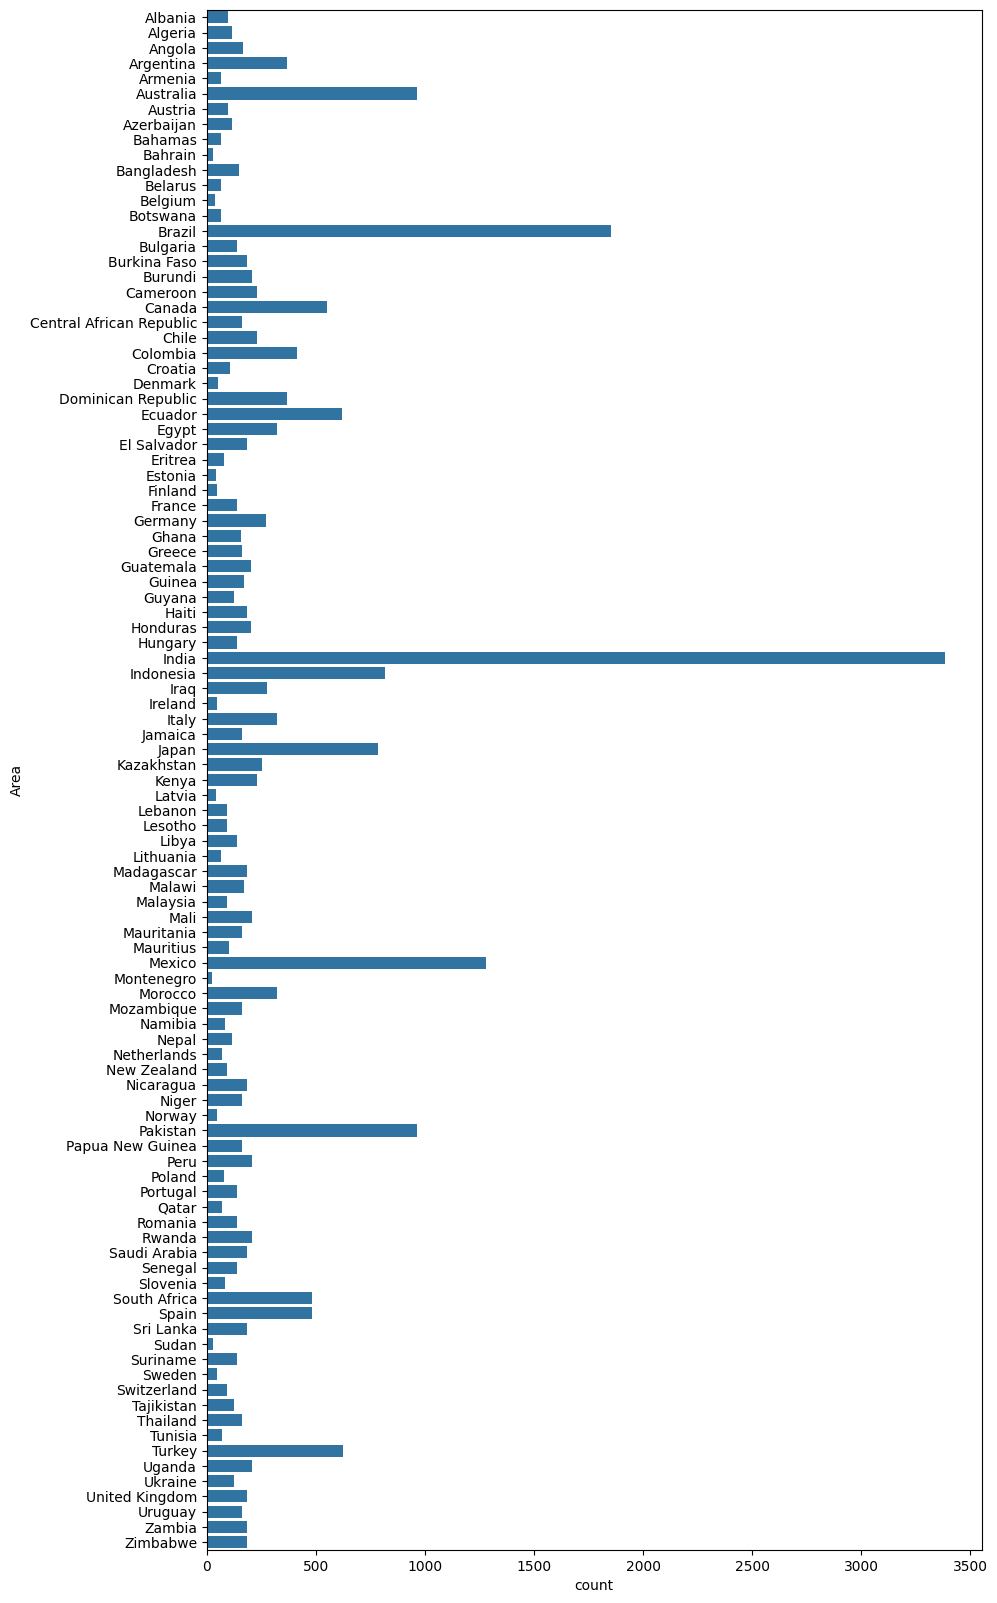

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(data=df, y='Area')

## Ploting yield per country

In [ ]:
yield_per_country = df.groupby('Area')['hg/ha_yield'].sum()
yield_per_country

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


<Axes: xlabel='hg/ha_yield', ylabel='Area'>

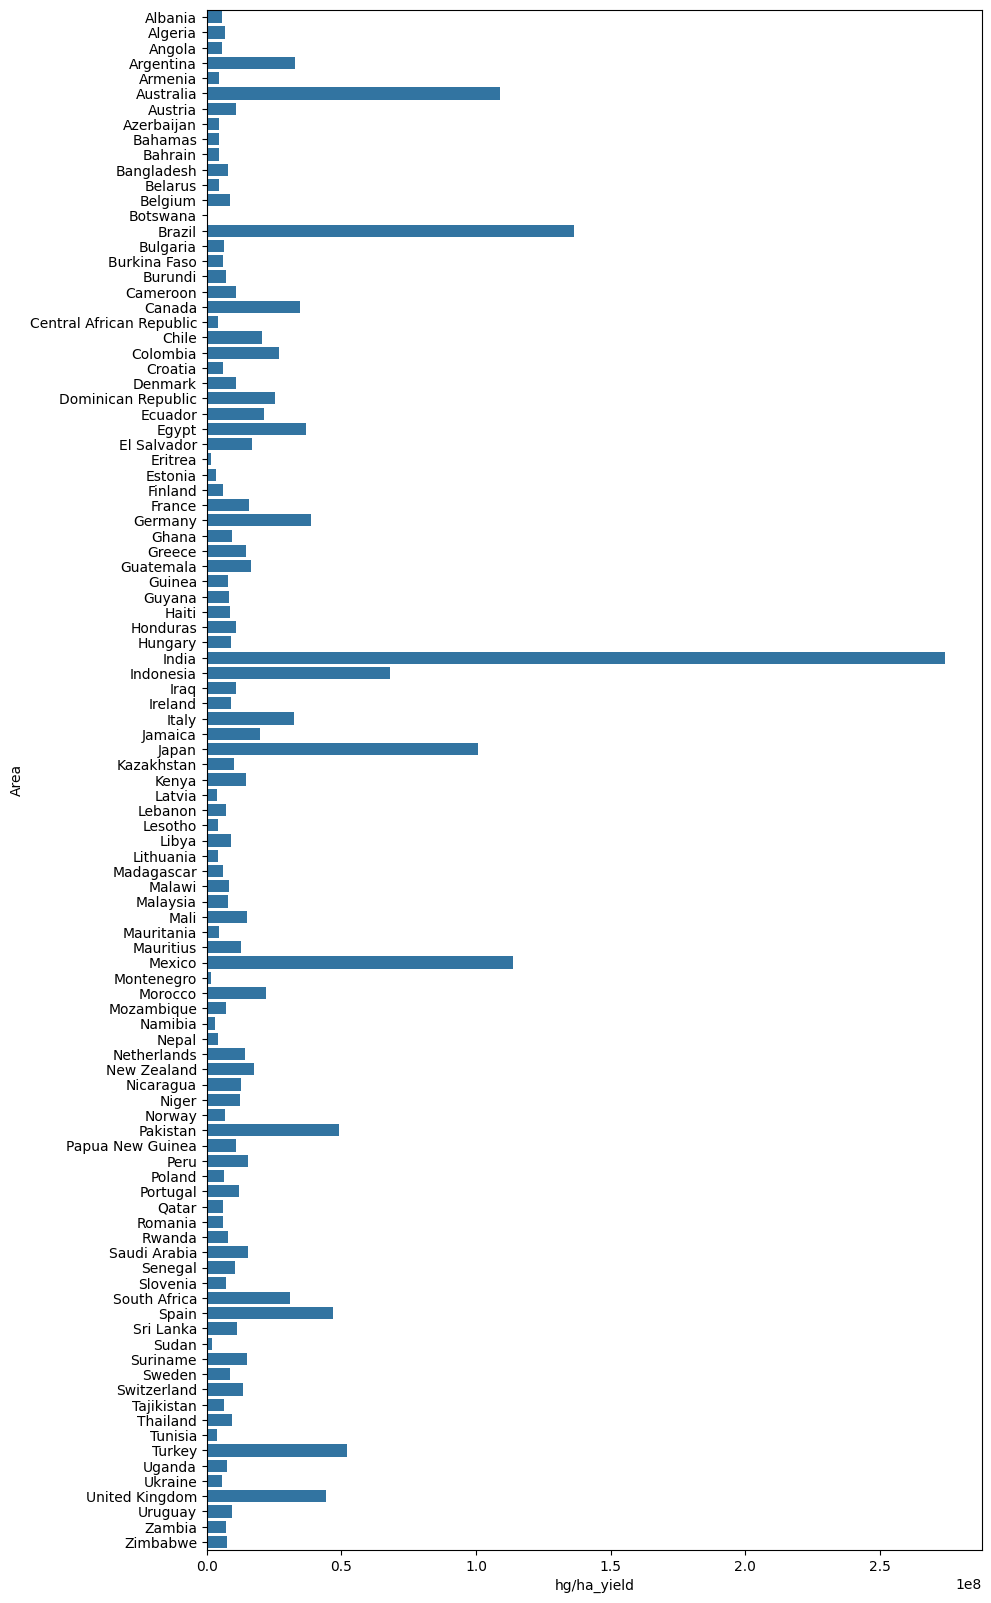

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(x=yield_per_country, y=yield_per_country.index)

## Ploting frequency of each item/crop

<Axes: xlabel='count', ylabel='Item'>

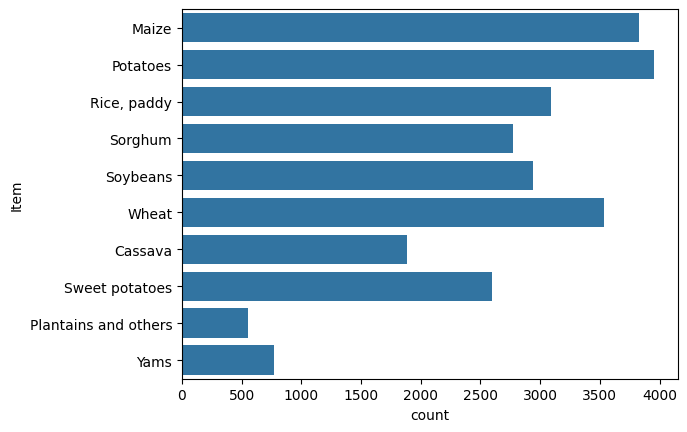

In [ ]:
sns.countplot(data=df, y='Item')

## Ploting yield per item/crop

In [ ]:
yield_per_item = df.groupby('Item')['hg/ha_yield'].sum()
yield_per_item

,hg/ha_yield
Item,
Cassava,275132269
Maize,142020761
Plantains and others,58958974
Potatoes,785921609
"Rice, paddy",127646024
Sorghum,52906376
Soybeans,49957039
Sweet potatoes,310269345
Wheat,106614786


<Axes: xlabel='hg/ha_yield', ylabel='Item'>

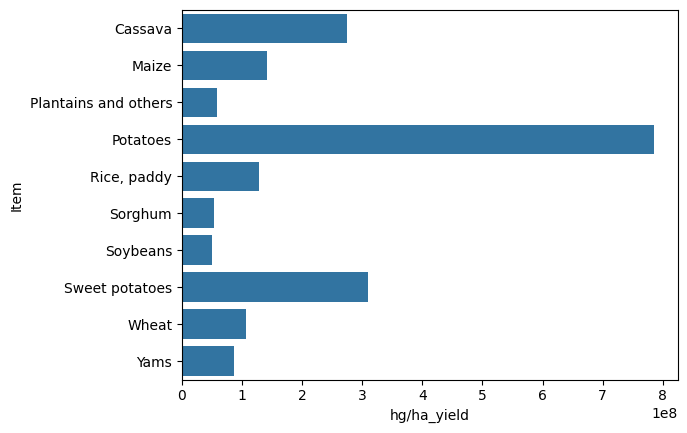

In [ ]:
sns.barplot(x=yield_per_item, y=yield_per_item.index)

In [ ]:
df.sample(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
7223,Dominican Republic,Plantains and others,1998,79861,1410.0,4375.0,27.14


In [ ]:
col = ['Year',	'average_rain_fall_mm_per_year',	'pesticides_tonnes',	'avg_temp', 'Area',	'Item',	'hg/ha_yield']
df = df[col]

In [ ]:
df.sample(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
15182,2008,2702.0,1597.0,27.03,Indonesia,"Rice, paddy",48948


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Column 'Area' and 'Item' are categorical so we need to convert them. because the column's value doesn't have any order like A,B,C, we need to use one hot encoding.

Also we need to do scaling. So, we will use a technnique called 'solumn transformer' so that we can do both simultaniously

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
oHE = OneHotEncoder(sparse_output=False, drop='first')
scaler = StandardScaler()

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('oneHotEncoder', oHE, [4, 5]),
        ('standardScaler', scaler, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
    ],
    remainder='passthrough'
)

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHotEncoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 [4, 5]),
                                ('standardScaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = {
    'lr': LinearRegression(),
    'lso': Lasso(),
    'rdg': Ridge(),
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    print(f"{name} R2 Score: {r2_score(y_test, y_pred)}")
    print(f"{name} MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred)}")

lr R2 Score: 0.7486562040956108
lr MAE: 29920.74193575171
lr MSE: 1821712446.6915064


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+10, tolerance: 1.482e+10
  model = cd_fast.enet_coordinate_descent(


lso R2 Score: 0.7485842229351427
lso MAE: 29907.604370718233
lso MSE: 1822234158.2996268
rdg R2 Score: 0.7485388180308394
rdg MAE: 29875.800781273923
rdg MSE: 1822563248.0987697
knr R2 Score: 0.9823870837354384
knr MAE: 4852.788008482745
knr MSE: 127656498.00997108
dtr R2 Score: 0.9778503327680921
dtr MAE: 4090.3292847503376
dtr MSE: 160538374.70406786


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_transformed, y_train)
y_pred = dtr.predict(X_test_transformed)

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
  input_df = pd.DataFrame({
      'Year': [Year],
      'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
      'pesticides_tonnes': [pesticides_tonnes],
      'avg_temp': [avg_temp],
      'Area': [Area],
      'Item': [Item]
  })
  input_array_transformed = transformer.transform(input_df)
  output = dtr.predict(input_array_transformed)
  return output

In [ ]:
Year = 	2002
average_rain_fall_mm_per_year = 3240.0
pesticides_tonnes = 84023.26
avg_temp = 27.77
Area = 'Colombia'
Item = 'Plantains and others'

result = prediction(Year,	average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp,	Area,	Item)

In [ ]:
X_train.sample(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
5820,2000,537.0,39667.0,5.14,Canada,Maize


In [ ]:
import pickle
pickle.dump(dtr, open('crop_yield.pkl', 'wb'))
pickle.dump(transformer, open('transformer.pkl', 'wb'))